### Introduction to Lucene Standard Algorithm
The Lucene Standard Algorithm is a part of the Apache Lucene project, a high-performance, full-featured text search engine library written in Java. Lucene is widely used for implementing search functionalities in applications. The algorithm is designed to index and search text efficiently.

On the next steps we are going to learn how the lucene standard algorithm works.


### 1. Tokenization with Lemmatization and Stemming

Tokenization splits text into individual tokens. Normalization standardizes tokens to ensure consistency.
Lemmatization and stemming reduce words to their root form. Here is the code to perform these steps:

### Important note 
Im stuyding Ml and Mongo certification together, this Lucene Standard Algorithm share one core concept with ML: correct tokenization.

    

In [1]:

import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download the necessary datasets
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Tokenization function
def tokenize(text):
    return text.split()

# Normalization function
def normalize(tokens):
    normalized_tokens = [re.sub(r'\W+', '', token).lower() for token in tokens]
    return normalized_tokens

# Stemming function
def stem(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Lemmatization function
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Example documents
documents = [
    "Lucene is a powerful search library",
    "Lucene is used to build search engines",
    "Lucene is an open-source project",
    "Lucene provides Java-based indexing and search technology"
]

# Preprocess the documents
processed_docs = [lemmatize(normalize(tokenize(doc))) for doc in documents]
processed_docs
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lanita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lanita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lanita\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[['lucene', 'is', 'a', 'powerful', 'search', 'library'],
 ['lucene', 'is', 'used', 'to', 'build', 'search', 'engine'],
 ['lucene', 'is', 'an', 'opensource', 'project'],
 ['lucene',
  'provides',
  'javabased',
  'indexing',
  'and',
  'search',
  'technology']]


### 2. Building the Inverted Index

An inverted index maps terms to their document positions. Here is the code to build an inverted index:
    

In [2]:

from collections import defaultdict

def build_inverted_index(docs):
    inverted_index = defaultdict(list)
    for idx, doc in enumerate(docs):
        for token in set(doc):
            inverted_index[token].append(idx)
    return inverted_index

inverted_index = build_inverted_index(processed_docs)
dict(inverted_index)
    

{'lucene': [0, 1, 2, 3],
 'powerful': [0],
 'search': [0, 1, 3],
 'library': [0],
 'a': [0],
 'is': [0, 1, 2],
 'engine': [1],
 'used': [1],
 'to': [1],
 'build': [1],
 'project': [2],
 'opensource': [2],
 'an': [2],
 'provides': [3],
 'javabased': [3],
 'technology': [3],
 'indexing': [3],
 'and': [3]}


### 3. Visualization of Term Frequencies

To understand the distribution of terms better, we can visualize the term frequencies across the documents:
    

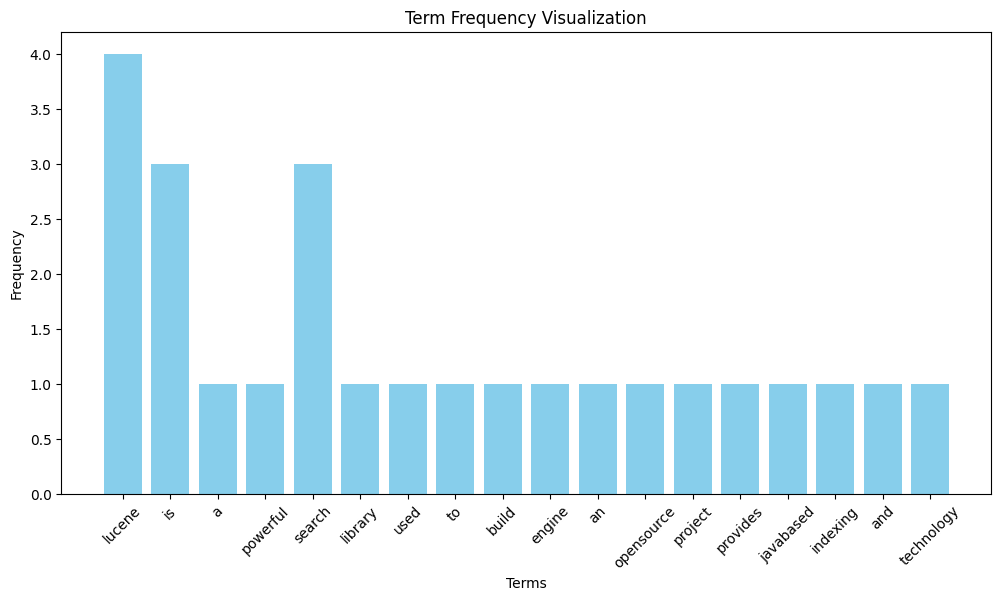

In [3]:

import matplotlib.pyplot as plt

# Create a frequency dictionary
term_frequencies = defaultdict(int)
for doc in processed_docs:
    for token in doc:
        term_frequencies[token] += 1

# Data for visualization
terms = list(term_frequencies.keys())
frequencies = list(term_frequencies.values())

# Create bar chart for term frequencies
plt.figure(figsize=(12, 6))
plt.bar(terms, frequencies, color='skyblue')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Term Frequency Visualization')
plt.xticks(rotation=45)
plt.show()
    


### 4. Understanding the Inverted Index Visualization

The inverted index visualization shows the number of documents each term appears in. Here is the enhanced visualization:
    

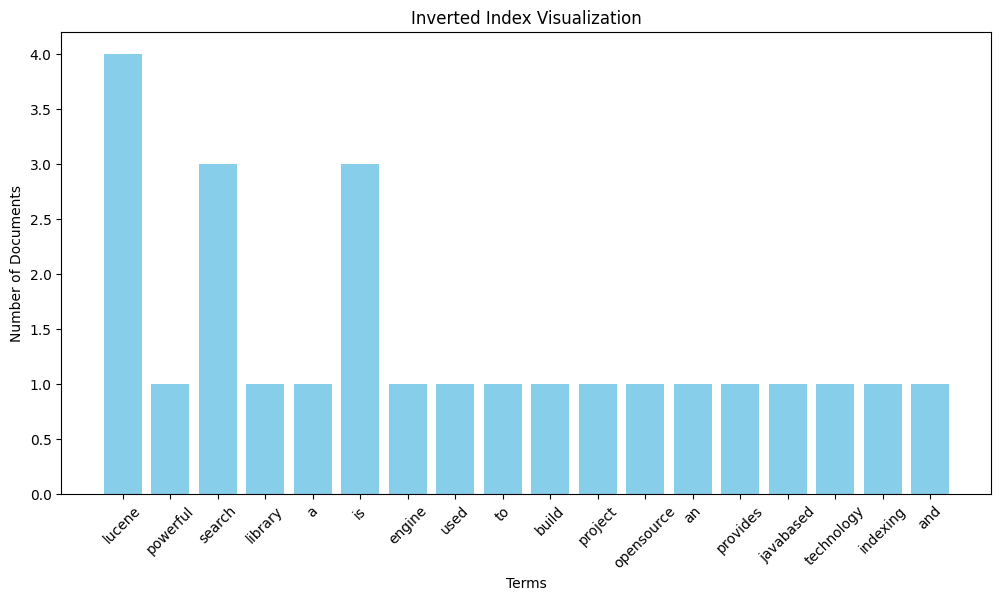

In [4]:

# Visualize the inverted index with document mappings
def visualize_inverted_index(inverted_index):
    terms = list(inverted_index.keys())
    doc_lists = [len(docs) for docs in inverted_index.values()]

    plt.figure(figsize=(12, 6))
    plt.bar(terms, doc_lists, color='skyblue')
    plt.xlabel('Terms')
    plt.ylabel('Number of Documents')
    plt.title('Inverted Index Visualization')
    plt.xticks(rotation=45)
    plt.show()

visualize_inverted_index(inverted_index)
    

### 5. Using Inverted Index and Lucene in MongoDB Atlas Search

#### Understanding MongoDB Atlas Search

MongoDB Atlas Search uses Apache Lucene to provide full-text search capabilities. When you create a search index in MongoDB, it leverages Lucene to create an inverted index on the specified fields of your documents. This allows for efficient text search operations, including relevance scoring, tokenization, and more.

#### Example: Using Inverted Index in MongoDB Atlas Search

Let's assume you have a MongoDB collection of documents that represent articles, and you want to search these articles based on their content.

1. **MongoDB Model**: Suppose you have a MongoDB collection `articles` with the following structure:
    ```json
    {
      "_id": ObjectId("..."),
      "title": "Introduction to Lucene",
      "content": "Lucene is a powerful search library used for full-text indexing and searching."
    }
    ```

2. **Creating the Inverted Index**: When you create a search index on the `title` and `content` fields in MongoDB Atlas Search, it uses Lucene to build an inverted index. This index maps terms to the documents they appear in.

3. **Python Code to Interact with MongoDB**: Here's how you might interact with MongoDB to leverage the inverted index for search.


In [5]:
from dotenv import  load_dotenv
import os
from pymongo import MongoClient

# Define the path to the .env file
env_path = "../.env"

# Load environment variables from .env file
load_dotenv(env_path, override=True)

# Get the MongoDB connection URL from the environment variable
mongo_db_url = os.getenv('MONGO_DB_URL')
# Connect to your MongoDB Atlas cluster
client = MongoClient(mongo_db_url)
your_database_name = "atlas_search_study"
db = client[your_database_name]
collection = db.articles

# Example documents
documents = [
    {"title": "Introduction to Lucene", "content": "Lucene is a powerful search library used for full-text indexing and searching."},
    {"title": "Using MongoDB Atlas Search", "content": "MongoDB Atlas Search integrates Lucene for advanced search capabilities."},
    {"title": "Lucene vs. Other Search Engines", "content": "Comparison of Lucene with other search engines."}
]

# Insert documents into the collection
collection.insert_many(documents)

# Define a search query using MongoDB Atlas Search
index_name = "articles_index"
search_query = {
    "$search": {
        "index": index_name,
        "text": {
            "query": "Lucene",
            "path": ["title", "content"]
        }
    }
}
# Execute the search query
try:
    results = collection.aggregate([search_query])
    for result in results:
        print(result)
except Exception as e:
    print("Error executing search query:", e)


{'_id': ObjectId('669462c24bebb1315d9af0a3'), 'title': 'Introduction to Lucene', 'content': 'Lucene is a powerful search library used for full-text indexing and searching.'}
{'_id': ObjectId('669462d84bebb1315d9af0a7'), 'title': 'Introduction to Lucene', 'content': 'Lucene is a powerful search library used for full-text indexing and searching.'}
{'_id': ObjectId('669464374bebb1315d9af0ab'), 'title': 'Introduction to Lucene', 'content': 'Lucene is a powerful search library used for full-text indexing and searching.'}
{'_id': ObjectId('669464544bebb1315d9af0af'), 'title': 'Introduction to Lucene', 'content': 'Lucene is a powerful search library used for full-text indexing and searching.'}
{'_id': ObjectId('669466b54bebb1315d9af0b3'), 'title': 'Introduction to Lucene', 'content': 'Lucene is a powerful search library used for full-text indexing and searching.'}
{'_id': ObjectId('669469994bebb1315d9af0b7'), 'title': 'Introduction to Lucene', 'content': 'Lucene is a powerful search library u

: 

### Static indexing

The fieldsl being queried are always the same